In [1]:
#Diretório dos dados.
import os
data_dir = 'TCC - Data'

TRABALHO DESENVOLVIDO NA DISCIPLINA DE TCC

Integrantes:

Kesley H. P. Amorim

Lucas Ferrari da Silva

Orientadores:

José Guilherme Picolo

Silvio Petroli Neto


**SECTION 1:** IMPORTS

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import numpy as np
from matplotlib import pyplot as plt

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**SECTION 2:** DATA AQUISITION


In [6]:
#Lista de pastas no diretório de dados
os.listdir(data_dir)
#Lista todos os arquivos armazenados na pasta 'Healthy'
os.listdir(os.path.join(data_dir, 'Healthy'))

class_labels = ['Bacterial Blight', 'Blast', 'Brownspot', 'Healthy', 'Tungro']

In [7]:
os.listdir(os.path.join(data_dir, 'Healthy'))

['IMG_20190419_123623.jpg',
 'IMG_20190419_123631.jpg',
 'IMG_20190419_123642.jpg',
 'IMG_20190419_123646.jpg',
 'IMG_20190419_123649.jpg',
 'IMG_20190419_123656.jpg',
 'IMG_20190419_123658.jpg',
 'IMG_20190419_123701.jpg',
 'IMG_20190419_123704.jpg',
 'IMG_20190419_123709.jpg',
 'IMG_20190419_123951.jpg',
 'IMG_20190419_123959.jpg',
 'IMG_20190419_124013.jpg',
 'IMG_20190419_124028.jpg',
 'IMG_20190419_124032.jpg',
 'IMG_20190419_124040.jpg',
 'IMG_20190419_124221.jpg',
 'IMG_20190419_124227.jpg',
 'IMG_20190419_124247.jpg',
 'IMG_20190419_124311.jpg',
 'IMG_20190419_124326.jpg',
 'IMG_20190419_124333.jpg',
 'IMG_20190419_124344.jpg',
 'IMG_20190419_124350.jpg',
 'IMG_20190419_124410.jpg',
 'IMG_20190419_124427.jpg',
 'IMG_20190419_124551.jpg',
 'IMG_20190419_124613.jpg',
 'IMG_20190419_124633.jpg',
 'IMG_20190419_124635.jpg',
 'IMG_20190419_124654.jpg',
 'IMG_20190419_124738.jpg',
 'IMG_20190419_124947.jpg',
 'IMG_20190419_124953.jpg',
 'IMG_20190419_125009.jpg',
 'IMG_20190419_12502

Importando dataset e criando as classes.

In [4]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir, label_mode='categorical',image_size=(300,300))

Found 7123 files belonging to 5 classes.


In [5]:
def one_hot_decode(predicted):
    decode = tf.argmax(predicted).numpy()
    return class_labels[decode]
    

#Label das classes

# [1,0,0,0,0] - Bacterial Blight - "Crestamento Bacteriano"
# [0,1,0,0,0] - Blast - "Brusone"
# [0,0,1,0,0] - Brownspot - "Mancha Parda"
# [0,0,0,1,0] - Healthy - "Saudável"
# [0,0,0,0,1] - Tungro - "Tungro"


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
data_batch = data_iterator.next()

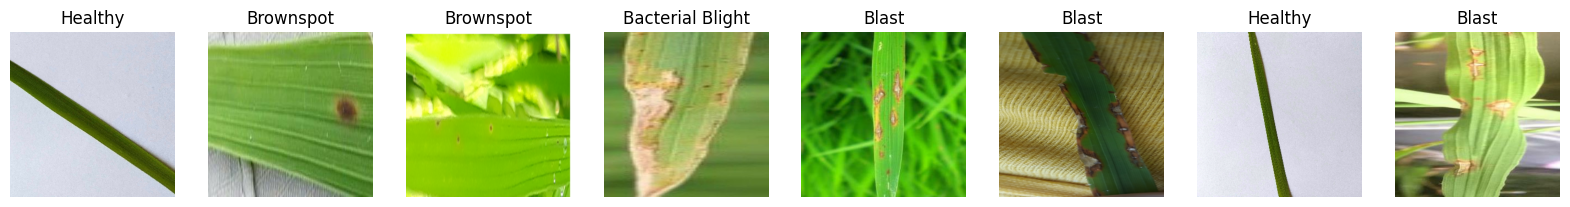

In [8]:
#Plotando as 8 primeiras imagens do data_batch
fig, ax = plt.subplots(ncols=8, figsize=(20,20))

for idx, img in enumerate(data_batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(one_hot_decode(data_batch[1][idx]))
  ax[idx].axis("off")

In [8]:
#Normalizando os canais de cores entre 0 e 1

norm_data = data.map(lambda x, y: (x/255, y))

In [8]:
data_batch = norm_data.as_numpy_iterator().next()

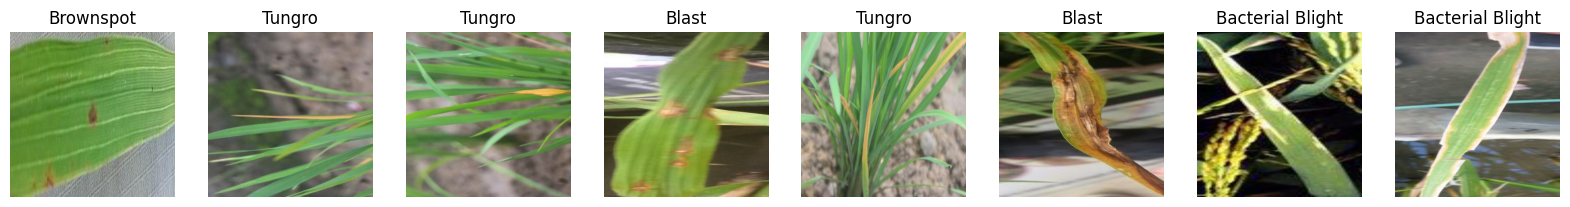

In [12]:
#Plotando as 8 primeiras imagens do data_batch
#com os canais R, G e B normalizados com valores entre 0 e 1
fig, ax = plt.subplots(ncols=8, figsize=(20,20))

for idx, img in enumerate(data_batch[0][:8]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(one_hot_decode(data_batch[1][idx]))
  ax[idx].axis("off")

In [9]:
#Total lenght of data batches = 223
#Total batche used = 222
len(norm_data)
# 70% - Treino - 156
train_size = int(len(norm_data)*.7)
# 20% - Validação - 44
validation_size = int(len(norm_data)*.2)
# 10% - Teste - 22 (+1)
test_size = int(len(norm_data)*.1)+1



In [10]:
#Separating the data into 3 variables, each containing a number of batches and each batch containing 32 images.
train = norm_data.take(train_size)
validation = norm_data.skip(train_size).take(validation_size)
test = norm_data.skip(train_size+validation_size).take(test_size)

Deep Learning Model


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
#Criação do modelo
model = Sequential()

In [29]:
#Convoluções:

#-----------------------------------
# Conv Block 01
#-----------------------------------
model.add(Conv2D(filters=32, kernel_size=7, padding='same', \
                 input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

#------------------------------------
# Conv Block 2
#------------------------------------
model.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

#------------------------------------
# Conv Block 3
#------------------------------------
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))





In [30]:
#Achatamento da rede e saída.
#------------------------------------
# Flatten the convolutional features.
#------------------------------------
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

In [31]:
#Compilação do modelo com optimizador adam
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      4736      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 150, 150, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 64)       

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
 hist = model.fit(train, epochs=20, validation_data=validation,
                 callbacks=[tensorboard_callback])

Epoch 1/20
156/156 [==============================] - 60s 377ms/step - loss: 1.3200 - accuracy: 0.5775 - val_loss: 0.7919 - val_accuracy: 0.7180
Epoch 2/20
156/156 [==============================] - 60s 379ms/step - loss: 0.7340 - accuracy: 0.7109 - val_loss: 0.5834 - val_accuracy: 0.7741
Epoch 3/20
156/156 [==============================] - 59s 376ms/step - loss: 0.5118 - accuracy: 0.8169 - val_loss: 0.4246 - val_accuracy: 0.8381
Epoch 4/20
156/156 [==============================] - 59s 376ms/step - loss: 0.3132 - accuracy: 0.8818 - val_loss: 0.2402 - val_accuracy: 0.9148
Epoch 5/20
156/156 [==============================] - 59s 375ms/step - loss: 0.2726 - accuracy: 0.9048 - val_loss: 0.1970 - val_accuracy: 0.9396
Epoch 6/20
156/156 [==============================] - 59s 373ms/step - loss: 0.1360 - accuracy: 0.9487 - val_loss: 0.1276 - val_accuracy: 0.9688
Epoch 7/20
156/156 [==============================] - 59s 373ms/step - loss: 0.1486 - accuracy: 0.9457 - val_loss: 0.1546 - val_ac

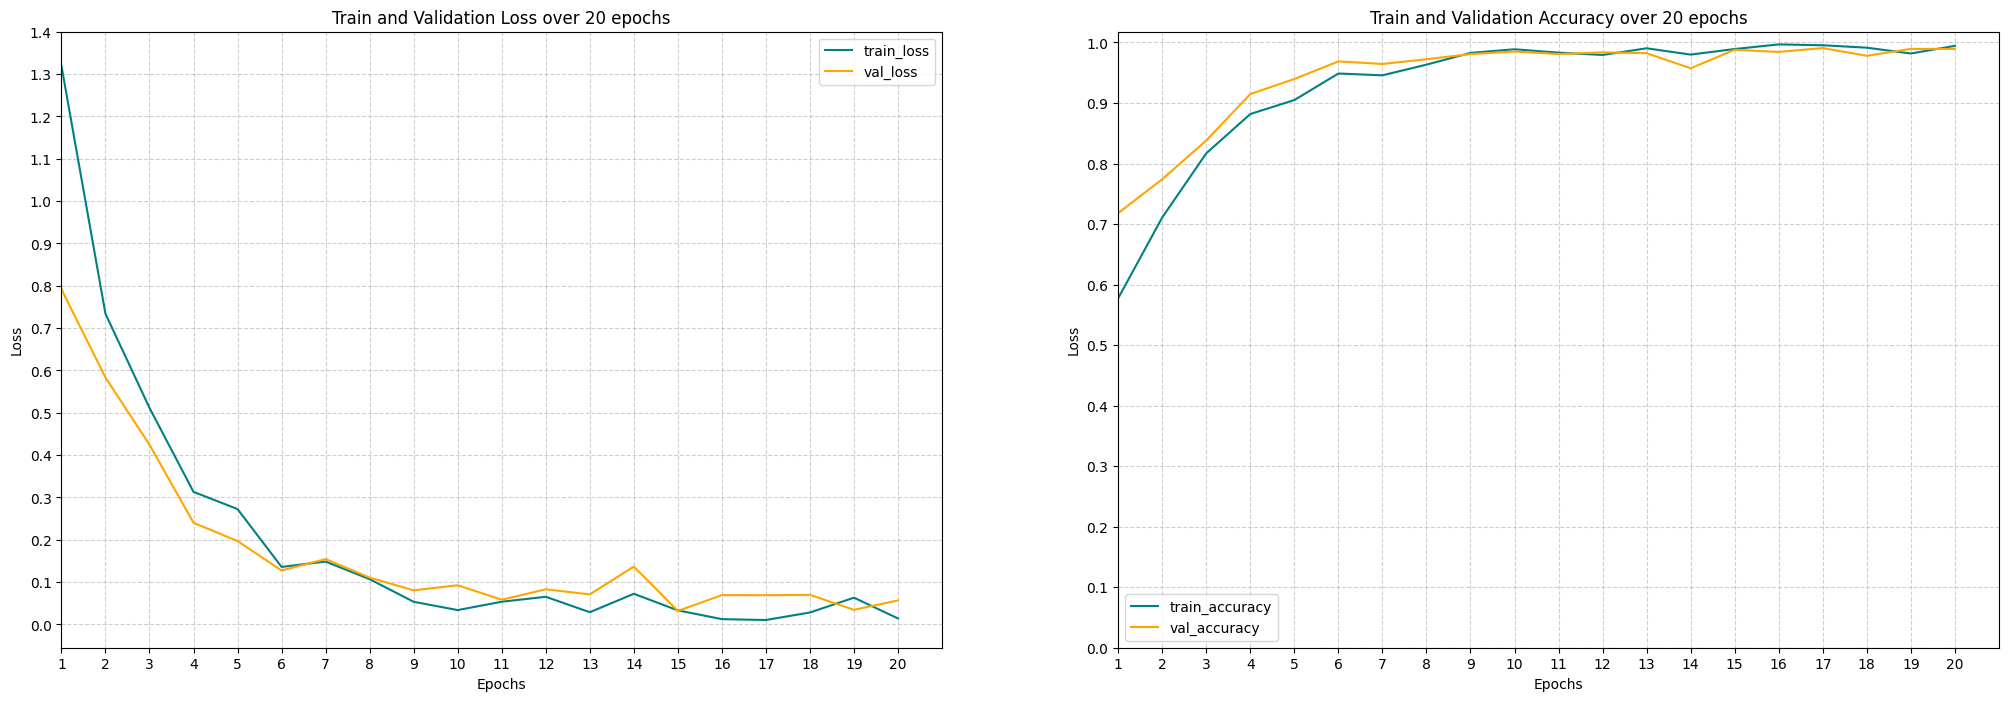

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,8))

ax1.set_title('Train and Validation Loss over 20 epochs')

ax1.plot(range(1,1+len(hist.history['loss'])), hist.history['loss'], color='teal', label='train_loss')
ax1.plot(range(1,1+len(hist.history['val_loss'])), hist.history['val_loss'], color='orange', label='val_loss')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')

ax1.set_xlim(1,21)
ax1.set_xticks(np.arange(1,21))

ax1.set_yticks(np.arange(0,1.5,0.1))
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.set_title('Train and Validation Accuracy over 20 epochs')

ax2.plot(range(1,1+len(hist.history['accuracy'])), hist.history['accuracy'], color='teal', label='train_accuracy')
ax2.plot(range(1,1+len(hist.history['val_accuracy'])), hist.history['val_accuracy'], color='orange', label='val_accuracy')

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')

ax2.set_xlim(1,21)
ax2.set_xticks(np.arange(1,21))

ax2.set_yticks(np.arange(0,1.1,0.1))
ax2.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [14]:
#Evaluating the model according to our metrics.
eval = model.evaluate(test)

23/23 [==============================] - 88s 209ms/step - loss: 0.0090 - accuracy: 0.9986


In [52]:
#Saving the trained model
#model.save('TCC_0.13L_9820acc.keras')

In [7]:
#Reloading de model saved.
model = tf.keras.models.load_model("TCC_0.13L_9820acc.keras")

In [11]:
layer = model.layers
layer

In [131]:
filters, biases = model.layers[6].get_weights()
print(layer[6].name, filters.shape)

conv2d_5 (3, 3, 64, 128)


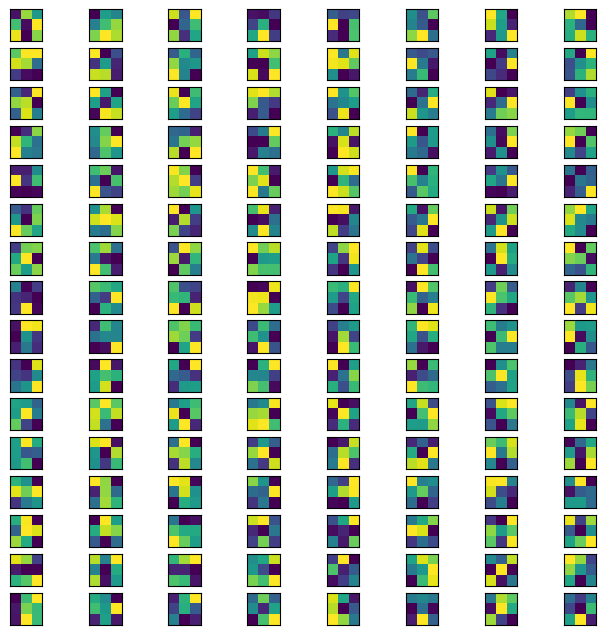

In [133]:
fig1 = plt.figure(figsize=(8,8))
col = 8
rows = 16
n_filters = col * rows
for i in range (1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 = plt.subplot(rows, col, i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0])
plt.show()

In [40]:
from keras.models import Model

ModuleNotFoundError: No module named 'tf'

In [29]:
conv_layers_index = [0, 3, 6]
outputs = [model.layers[i].output for i in conv_layers_index]
model_short = Model(inputs = model.inputs, outputs = outputs)
print(model_short.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 300, 300, 3)]    0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      4736      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 150, 150, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                         

In [44]:
from keras.utils import load_img, img_to_array

In [52]:
img = load_img('brwsp.jpg', target_size=(300,300))

In [53]:
img = img_to_array(img)

In [55]:
img = np.expand_dims(img, axis=0)

In [56]:
feature_output = model_short.predict(img)

1/1 [==============================] - 12s 12s/step


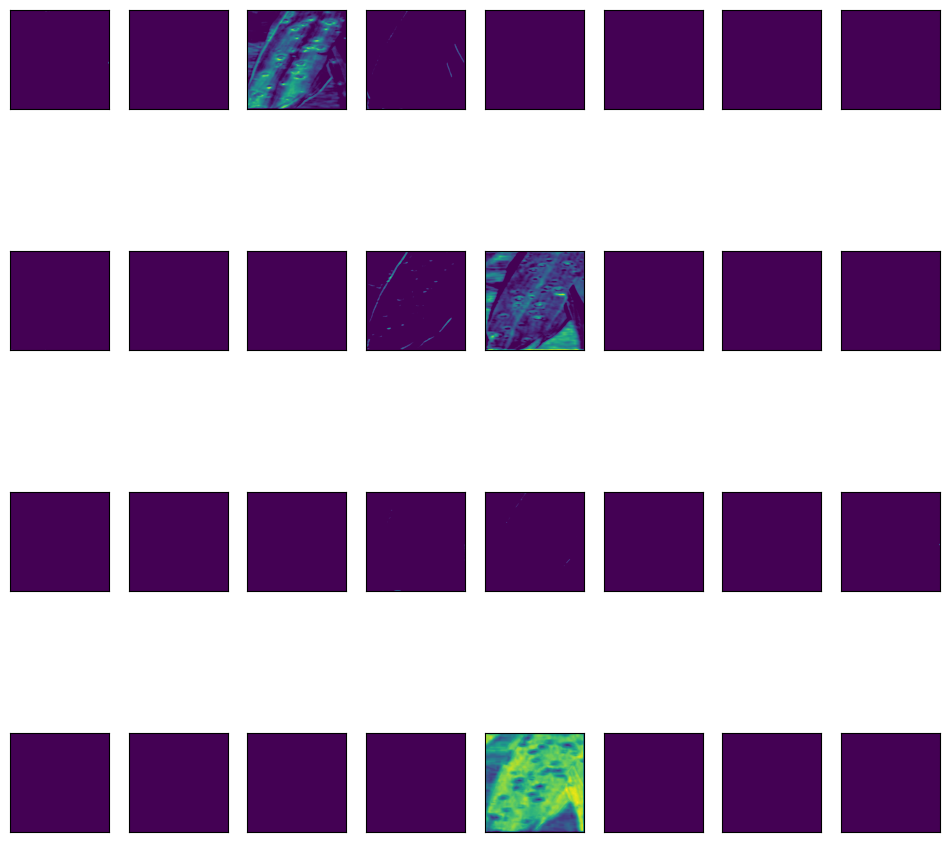

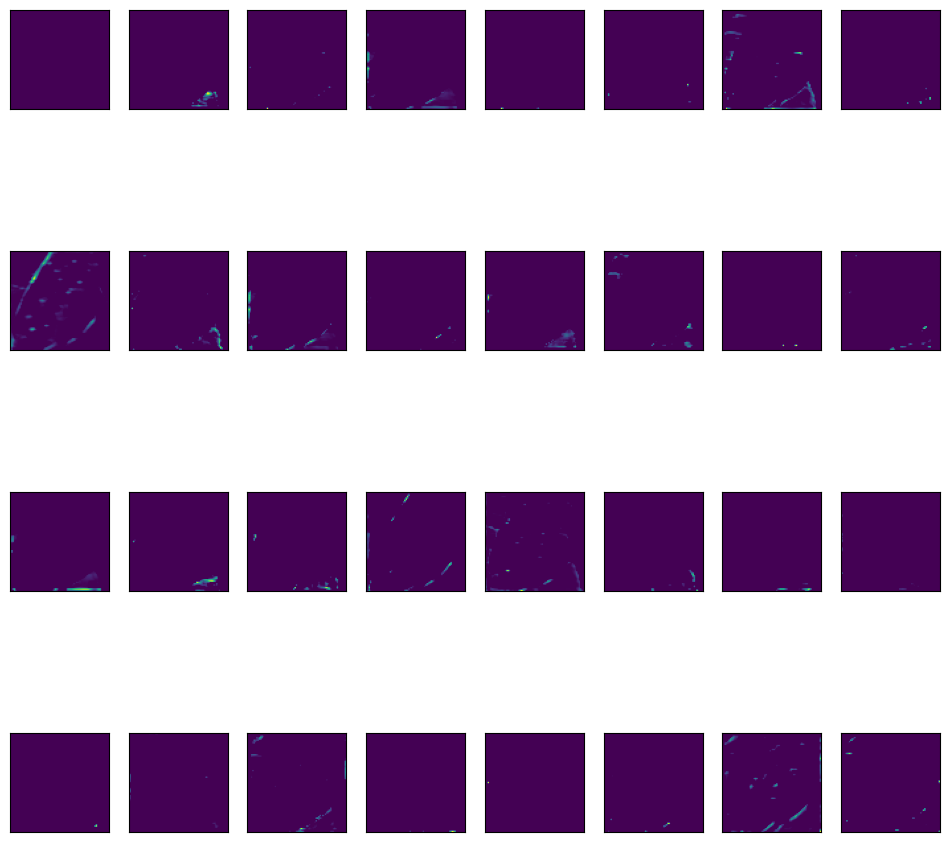

In [135]:
columns = 8
rows = 4
for ftr in feature_output:
    fig = plt.figure(figsize=(12, 12))
    for i in range (1, columns*rows +1):
        fig = plt.subplot(rows, columns, i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1])
    plt.savefig("{}.jpg".format(i))


In [113]:
ftr.shape

(1, 300, 300, 32)

In [16]:
image = test.as_numpy_iterator()
img2pred, label = image.next()

1/1 [==============================] - 7s 7s/step


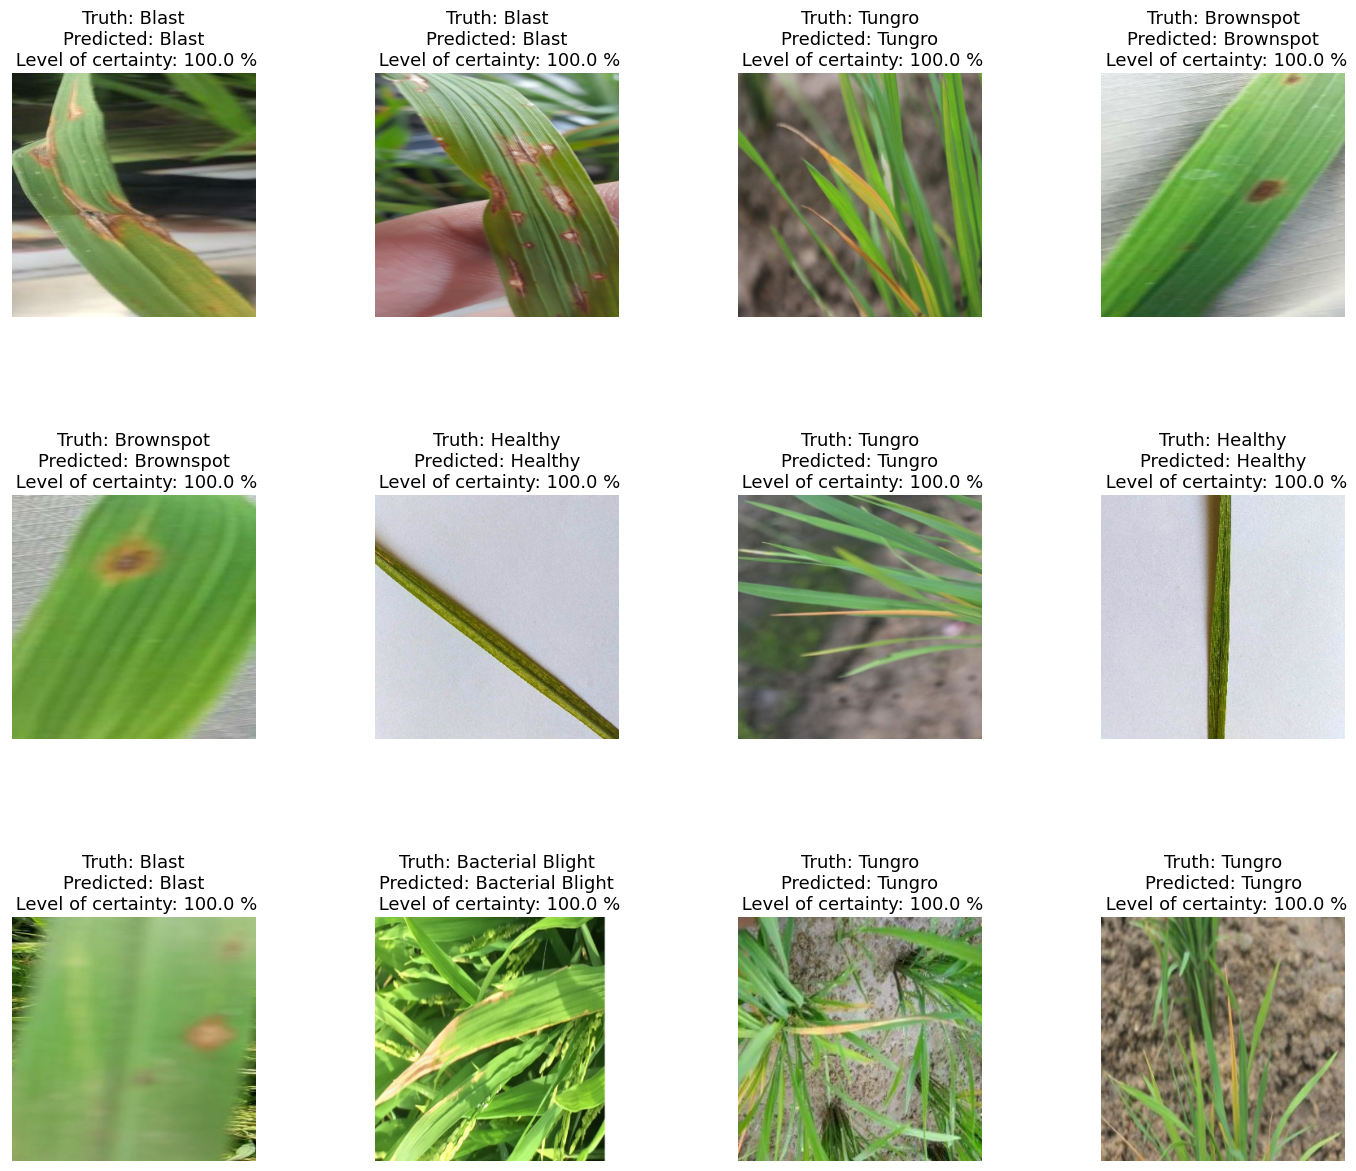

In [17]:

plt.figure(figsize=(15, 15))

pred = model.predict(img2pred)
#for images, labels in image:
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    precision = np.round((pred[i].max()*100),2)
    title = "Truth: " + str(one_hot_decode(label[i])) + "\nPredicted: " + str(one_hot_decode(pred[i])) + "\n Level of certainty: " + str(precision) + " %"
    plt.imshow(img2pred[i].astype("float"))
    title_obj = plt.title(title, fontdict={'fontsize':13})
    plt.tight_layout(pad=6.0)
    plt.axis("off")


In [18]:
#Iterating all-data and adding matching results to make the confusion matrix.
cm_total = 0
for batch in test.as_numpy_iterator():
    X,y = batch
    predictions = model.predict(X)
    cm_predicted = tf.argmax(predictions, axis=1)
    cm_truth = tf.argmax(y, axis=1)
    cm_total += tf.math.confusion_matrix(cm_truth, cm_predicted)

cm_total

1/1 [==============================] - 1s 915ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[158,   0,   0,   0,   0],
       [  1, 142,   0,   0,   1],
       [  1,   0, 171,   0,   0],
       [  0,   0,   0, 130,   0],
       [  0,   0,   0,   0, 119]])>

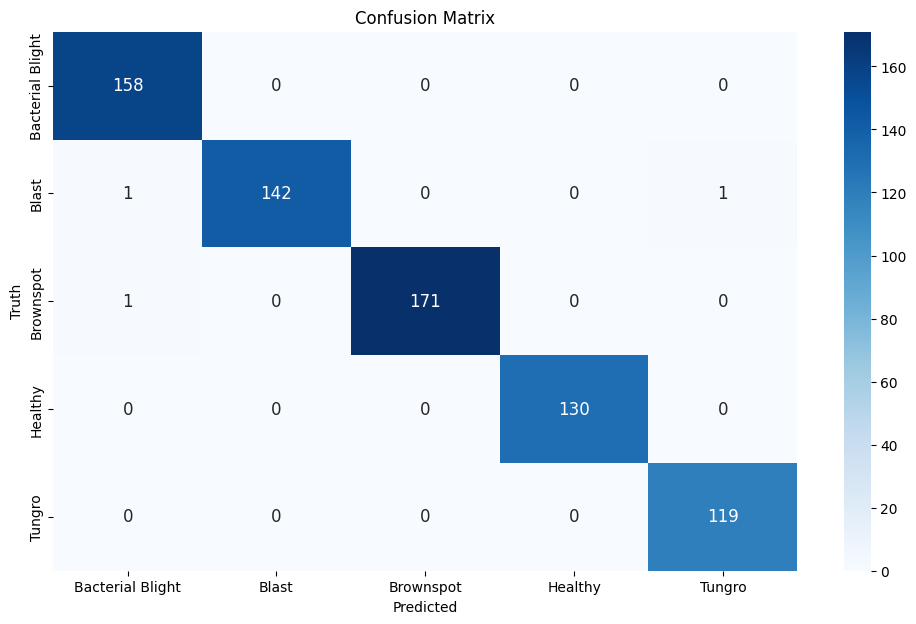

In [19]:
#Using cm_total data to drawn the confusion matrix using the seaborn library.
import seaborn as sns

plt.figure(figsize=[12, 7])
sns.heatmap(cm_total, annot=True, fmt='d', annot_kws={'size': 12}, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],['Bacterial Blight', 'Blast', 'Brownspot', 'Healthy', 'Tungro'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5],['Bacterial Blight', 'Blast', 'Brownspot', 'Healthy', 'Tungro'])
plt.ylabel('Truth')
plt.show()

Found 16 files belonging to 5 classes.
1/1 [==============================] - 0s 176ms/step


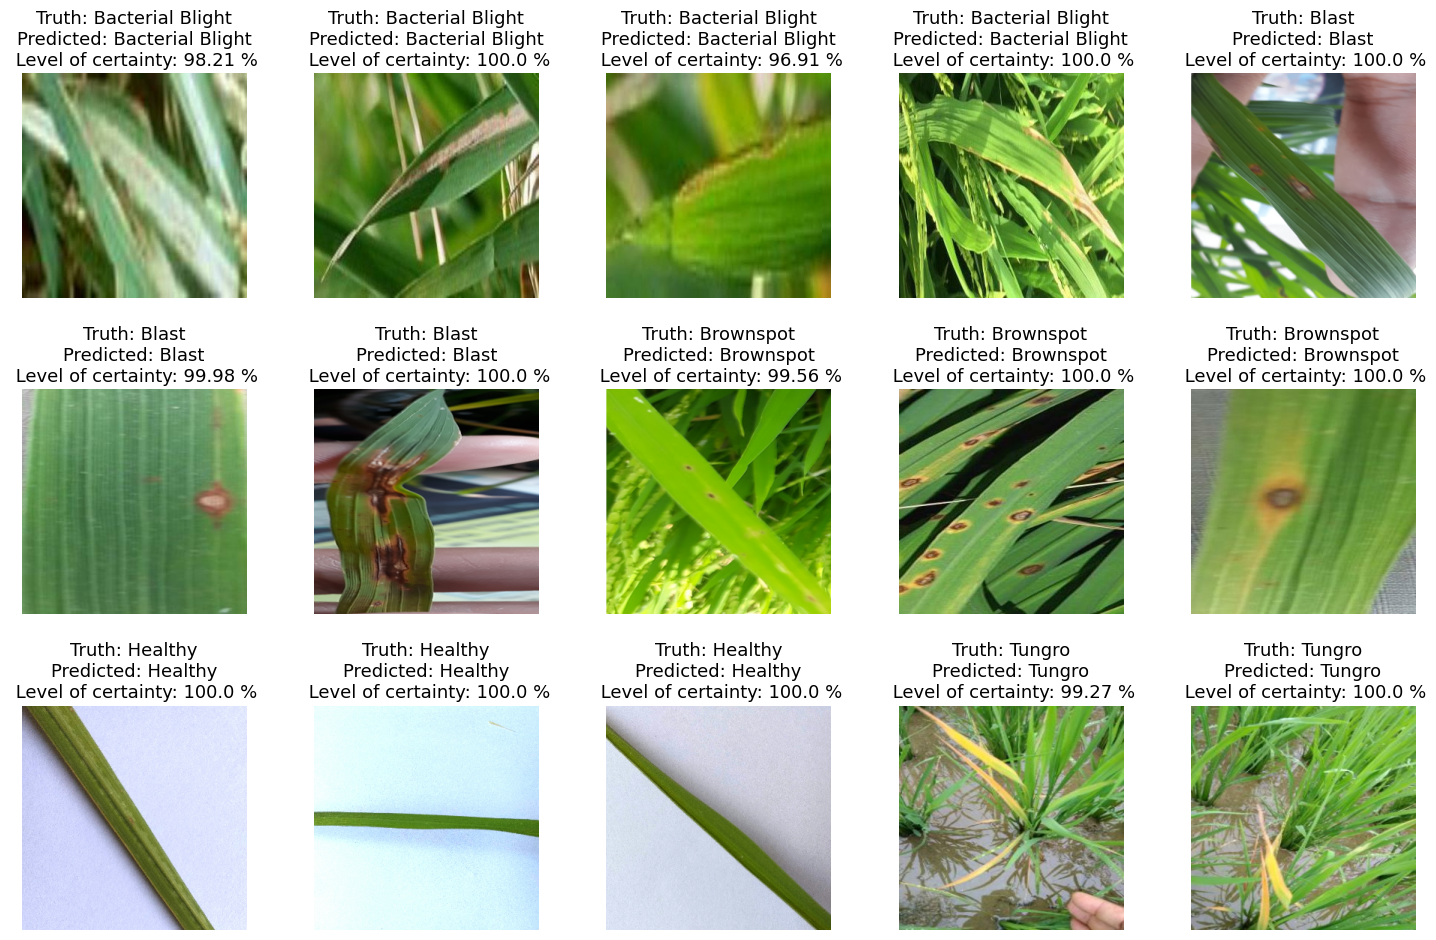

In [57]:
manual_test = 'mytest'

mtest = tf.keras.utils.image_dataset_from_directory(manual_test, label_mode='categorical',image_size=(300,300), shuffle=False)

mtest = mtest.map(lambda x, y: (x/255, y))

plt.figure(figsize=(15, 10))

predtest = model.predict(mtest)

for images, labels in mtest.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    precision = np.round((predtest[i].max()*100),2)
    plt.imshow(images[i].numpy().astype("float"))
    title = "Truth: " + str(one_hot_decode(labels[i])) + "\nPredicted: " + str(one_hot_decode(predtest[i])) + "\n Level of certainty: " + str(precision) + " %"
    plt.title(title, fontdict={'fontsize':13})
    plt.tight_layout(pad=2.0)
    plt.axis("off")

In [6]:
test_dir = 'Test Data'

In [7]:
data = tf.keras.utils.image_dataset_from_directory(
    test_dir, label_mode='categorical',image_size=(300,300), batch_size = 1869)

Found 1869 files belonging to 5 classes.


In [8]:
norm_data = data.map(lambda x, y: (x/255, y))

In [9]:
data_batch = norm_data.as_numpy_iterator().next()

In [43]:
data_batch

(array([[[[0.3137255 , 0.32941177, 0.19215687],
          [0.23137255, 0.24705882, 0.10980392],
          [0.16862746, 0.18431373, 0.03921569],
          ...,
          [0.4627451 , 0.6       , 0.2       ],
          [0.4627451 , 0.6       , 0.20784314],
          [0.4627451 , 0.6       , 0.20784314]],
 
         [[0.30588236, 0.32156864, 0.1764706 ],
          [0.21960784, 0.24313726, 0.09411765],
          [0.15686275, 0.17254902, 0.02745098],
          ...,
          [0.47843137, 0.6156863 , 0.21568628],
          [0.48235294, 0.61960787, 0.21960784],
          [0.48235294, 0.61960787, 0.21960784]],
 
         [[0.32156864, 0.34901962, 0.1882353 ],
          [0.2509804 , 0.28235295, 0.12156863],
          [0.1882353 , 0.21568628, 0.05490196],
          ...,
          [0.5568628 , 0.69411767, 0.28627452],
          [0.56078434, 0.69803923, 0.2901961 ],
          [0.5647059 , 0.7019608 , 0.29411766]],
 
         ...,
 
         [[0.43529412, 0.3254902 , 0.16862746],
          [0.47450

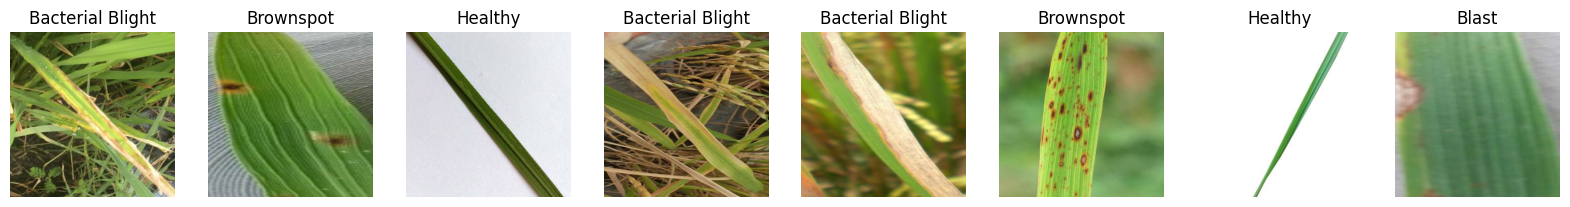

In [51]:
#Plotando as 8 primeiras imagens do data_batch
#com os canais R, G e B normalizados com valores entre 0 e 1
fig, ax = plt.subplots(ncols=8, figsize=(20,20))

for idx, img in enumerate(data_batch[0][:8]):
  ax[idx].imshow(img.astype(float))
  ax[idx].title.set_text(one_hot_decode(data_batch[1][idx]))
  ax[idx].axis("off")

In [11]:
from sklearn import metrics

In [9]:
y_predicted = []
y_truth = []
for batch in norm_data.as_numpy_iterator():
    X,y = batch
    predictions = model.predict(X)
    y_predicted = tf.argmax(predictions, axis=1)
    y_truth = tf.argmax(y, axis=1)
    

59/59 [==============================] - 6s 58ms/step


In [26]:
report = metrics.classification_report(y_truth, y_predicted, digits = 4)


In [27]:
print(report)

              precision    recall  f1-score   support

           0     0.9842    0.9613    0.9726       388
           1     0.9843    0.9894    0.9868       379
           2     0.9861    0.9493    0.9674       375
           3     0.8998    0.9973    0.9460       369
           4     0.9941    0.9413    0.9670       358

    accuracy                         0.9679      1869
   macro avg     0.9697    0.9678    0.9680      1869
weighted avg     0.9698    0.9679    0.9681      1869



In [25]:
img2pred, label=data_batch

NameError: name 'data_batch' is not defined

1/1 [==============================] - 0s 54ms/step


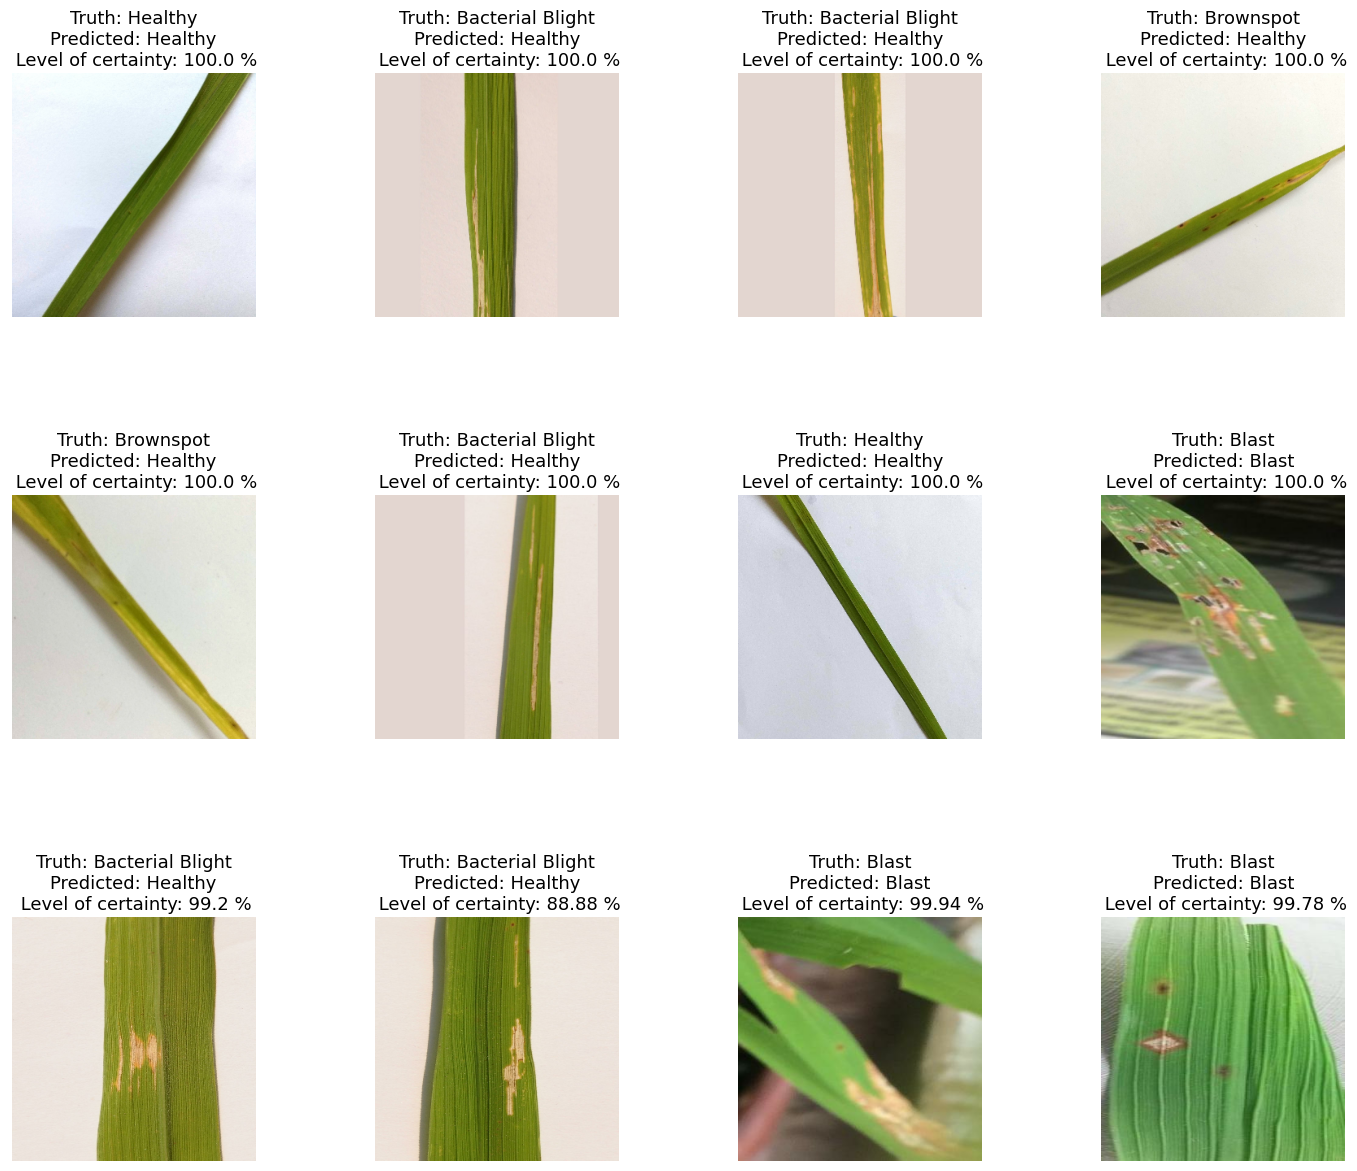

In [30]:
plt.figure(figsize=(15, 15))

pred = model.predict(img2pred)
#for images, labels in image:
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    precision = np.round((pred[i].max()*100),2)
    title = "Truth: " + str(one_hot_decode(label[i])) + "\nPredicted: " + str(one_hot_decode(pred[i])) + "\n Level of certainty: " + str(precision) + " %"
    plt.imshow(img2pred[i].astype("float"))
    title_obj = plt.title(title, fontdict={'fontsize':13})
    plt.tight_layout(pad=6.0)
    plt.axis("off")


In [22]:

c_matrix = tf.math.confusion_matrix(y_truth, y_predicted)
c_matrix


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[373,   2,   3,   8,   2],
       [  1, 375,   0,   3,   0],
       [  2,   2, 356,  15,   0],
       [  1,   0,   0, 368,   0],
       [  2,   2,   2,  15, 337]])>

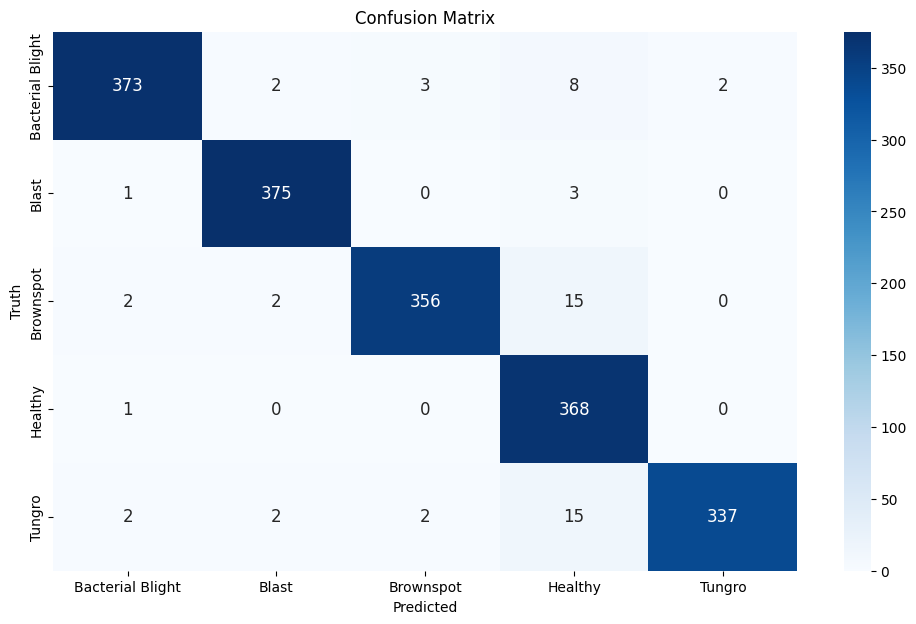

In [24]:
import seaborn as sns

plt.figure(figsize=[12, 7])
sns.heatmap(c_matrix, annot=True, fmt='d', annot_kws={'size': 12}, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],['Bacterial Blight', 'Blast', 'Brownspot', 'Healthy', 'Tungro'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5],['Bacterial Blight', 'Blast', 'Brownspot', 'Healthy', 'Tungro'])
plt.ylabel('Truth')
plt.show()